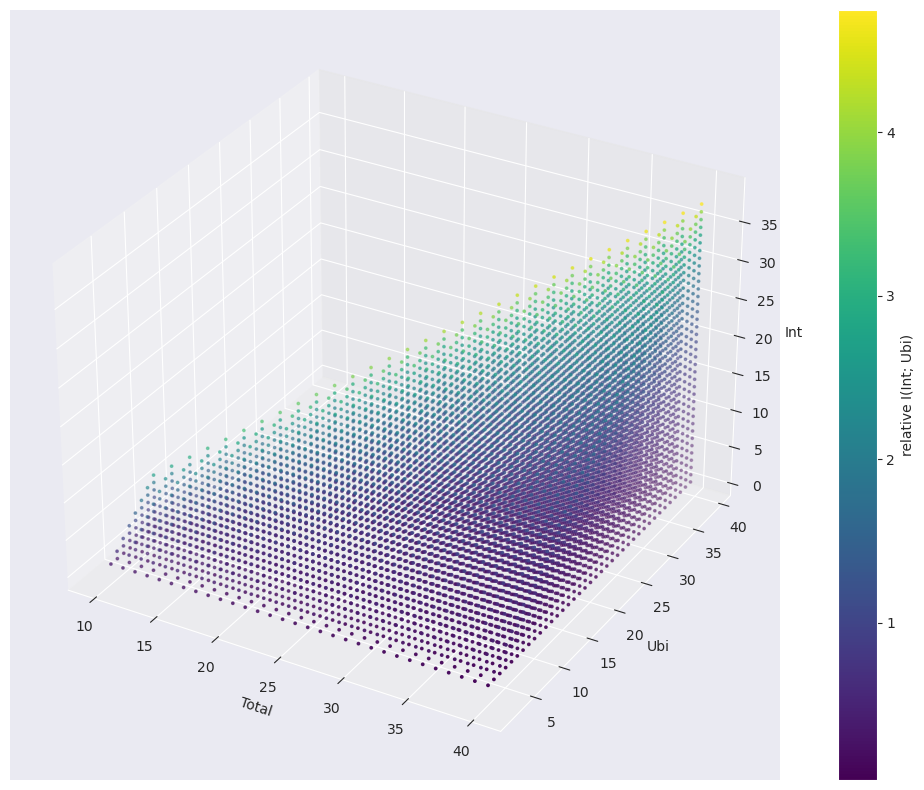

In [26]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Define the range for total number of applications
num_min = 10
num_max = 40

# Initialize lists to store data
n_total_app = []
n_Ubi_app = []
n_Int_app = []
H_Ubi_app = []
H_Int_app = []
H_Ubi_Int_app = []
delta_app = []

# Function to calculate entropy
def h(p):
    return - p * math.log(p, 2) - (1 - p) * math.log((1 - p), 2)

# Function to calculate overlap: I(Int|Ubi)
def hc(i, j, k):
    return h((k / j)) * (j / i)

# Populate the lists with data
for i in range(num_min, num_max + 1):
    for j in range(1, i):
        for k in range(1, j):
            n_total_app.append(i)
            n_Ubi_app.append(j)
            n_Int_app.append(k)
            H_Ubi_app.append(h(j / i))
            H_Int_app.append(h(k / i))
            H_Ubi_Int_app.append(hc(i, j, k))
            delta_app.append((h(k / i) - hc(i, j, k))/ (1 - (j / i)))

# Create DataFrame
n_total = pd.DataFrame(n_total_app, columns=['Total'])           
n_Ubi = pd.DataFrame(n_Ubi_app, columns=['Ubi'])
n_Int = pd.DataFrame(n_Int_app, columns=['Int'])
H_Ubi = pd.DataFrame(H_Ubi_app, columns=['Ubi_Ent'])
H_Int = pd.DataFrame(H_Int_app, columns=['Int_Ent'])
H_Ubi_Int = pd.DataFrame(H_Ubi_Int_app, columns=['H(Int|Ubi)'])
delta = pd.DataFrame(delta_app, columns=['relative I(Int; Ubi)'])

# Combine all data into a single DataFrame
d = pd.concat([n_total, n_Ubi, n_Int, H_Ubi, H_Int, H_Ubi_Int, delta], axis = 1, join = "inner")

# Plotting
sns.set_style("darkgrid")

X = d['Total']
Y = d['Ubi']
Z = d['Int']
C = d['relative I(Int; Ubi)']

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("Total")
ax.set_ylabel("Ubi")
ax.set_zlabel("Int")


sc = ax.scatter(X, Y, Z, c = C, marker = "o", s = 3, cmap = 'viridis')
plt.colorbar(sc, ax = ax, label = 'relative I(Int; Ubi)')

plt.savefig("3Dplot_20241008.png")
plt.show()

In [2]:
d.to_csv('Watabe_et_al_20240806.txt', sep = '\t', index = True)

In [3]:
d

,Total,Ubi,Int,Ubi_Ent,Int_Ent,H(Int|Ubi),I(Int; Ubi)
0,10,2,1,0.721928,0.468996,0.200000,0.268996
1,10,3,1,0.881291,0.468996,0.275489,0.193507
2,10,3,2,0.881291,0.721928,0.275489,0.446439
3,10,4,1,0.970951,0.468996,0.324511,0.144484
4,10,4,2,0.970951,0.721928,0.400000,0.321928
...,...,...,...,...,...,...,...
9791,40,39,34,0.168661,0.609840,0.538683,0.071158
9792,40,39,35,0.168661,0.543564,0.465145,0.078420
9793,40,39,36,0.168661,0.468996,0.381462,0.087533
9794,40,39,37,0.168661,0.384312,0.284523,0.099789


In [21]:
df_40 = d[d.Total == 40]
df_40_20 = df_40[df_40.Ubi == 20]
df_40_20

,Total,Ubi,Int,Ubi_Ent,Int_Ent,H(Int|Ubi),relative I(Int; Ubi)
9226,40,20,1,1.0,0.168661,0.143198,0.050925
9227,40,20,2,1.0,0.286397,0.234498,0.103798
9228,40,20,3,1.0,0.384312,0.304920,0.158783
9229,40,20,4,1.0,0.468996,0.360964,0.216063
9230,40,20,5,1.0,0.543564,0.405639,0.275851
9231,40,20,6,1.0,0.609840,0.440645,0.338390
9232,40,20,7,1.0,0.669016,0.467034,0.403964
9233,40,20,8,1.0,0.721928,0.485475,0.472906
9234,40,20,9,1.0,0.769193,0.496387,0.545611
9235,40,20,10,1.0,0.811278,0.500000,0.622556


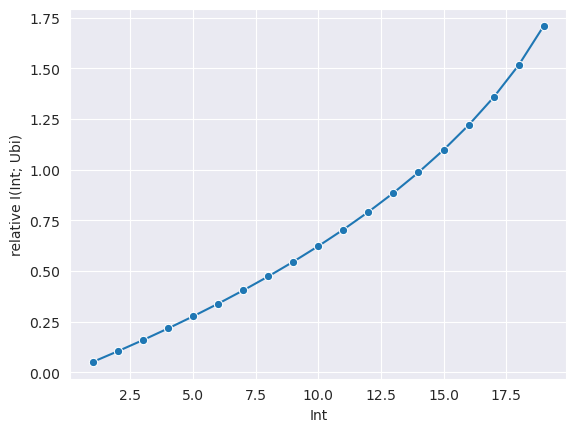

In [23]:
sns.lineplot(x = 'Int', y = 'relative I(Int; Ubi)', data = df_40_20, marker = 'o')
plt.savefig("40_20_20241008.png")

In [24]:
df_40 = d[d.Total == 40]
df_40_39 = df_40[df_40.Ubi == 39]
df_40_39

,Total,Ubi,Int,Ubi_Ent,Int_Ent,H(Int|Ubi),relative I(Int; Ubi)
9758,40,39,1,0.168661,0.168661,0.167736,0.036996
9759,40,39,2,0.168661,0.286397,0.284523,0.074966
9760,40,39,3,0.168661,0.384312,0.381462,0.113963
9761,40,39,4,0.168661,0.468996,0.465145,0.154043
9762,40,39,5,0.168661,0.543564,0.538683,0.195268
9763,40,39,6,0.168661,0.609840,0.603898,0.237707
9764,40,39,7,0.168661,0.669016,0.661980,0.281431
9765,40,39,8,0.168661,0.721928,0.713765,0.326523
9766,40,39,9,0.168661,0.769193,0.759866,0.373070
9767,40,39,10,0.168661,0.811278,0.800749,0.421168


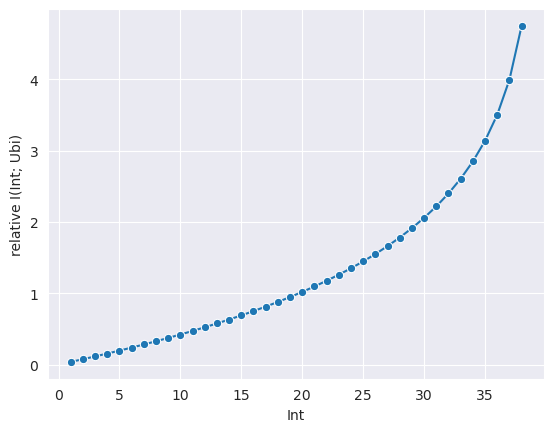

In [25]:
sns.lineplot(x = 'Int', y = 'relative I(Int; Ubi)', data = df_40_39, marker = 'o')
plt.savefig("40_39_20241008.png")